## Inventory Dynamics

#### John Stachurski

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Sample Paths and Joint Distributions

Consider a firm with inventory $X_t$

Wait till $X_t \leq s$, then order $S$ units

Firm faces stochastic demand $D_{t+1}$, where $\{D_t\}$ is independent with common distribution $\phi$

Inventory follows


\begin{equation*}
  X_{t+1} = 
  \begin{cases}
      ( S - D_{t+1})^+ & \quad \text{if } X_t \leq s \\
      ( X_t - D_{t+1} )^+ &  \quad \text{if } X_t > s
  \end{cases}
\end{equation*}


Here $a^+ := \max\{a, 0\}$

We'll assume that $\phi$ is the geometric distribution, so that

$$ \mathbb P \{D_t = d\} = (1 - p)^d p $$

for $d = 0, 1, \ldots$.  Here $p$ is a parameter in $(0, 1)$.

In [2]:
s, S = 10, 100
p = 0.4

def ϕ():
    return np.random.geometric(p) - 1

def G(x, d):
    if x <= s:
        return max(S - d, 0)
    else:
        return max(x - d, 0)
    

A first simulation:

In [3]:
sim_length = 100
X = np.empty(sim_length)
X[0] = 50

for t in range(sim_length-1):
    D = ϕ()
    X[t+1] = G(X[t], D)

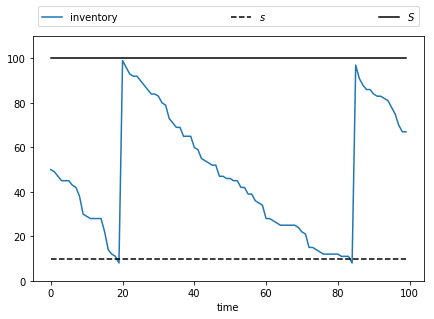

In [4]:
fig, ax = plt.subplots(figsize=(7, 4.5))
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 3,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}

ax.plot(X, label="inventory")
ax.plot(s * np.ones(sim_length), 'k--', label="$s$")
ax.plot(S * np.ones(sim_length), 'k-', label="$S$")
ax.set_ylim(0, S+10)
ax.set_xlabel("time")
ax.legend(**legend_args)

plt.show()

Let's make a function for simulating paths

In [5]:
def sim_inventory_path(initial_x=50, sim_length=100):
    X = np.empty(sim_length)
    X[0] = 50

    for t in range(sim_length-1):
        D = ϕ()
        X[t+1] = G(X[t], D)
    
    return X

Simulate multiple paths:

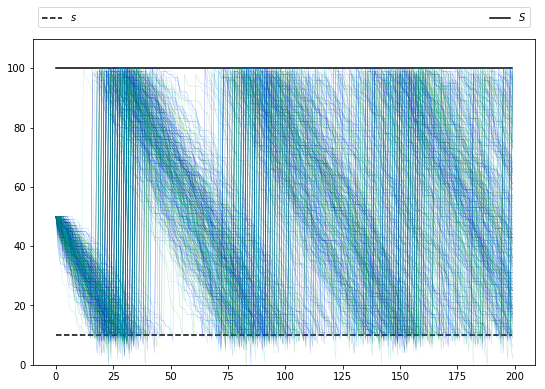

In [6]:
sim_length=200
fig, ax = plt.subplots(figsize=(9, 6))
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 3,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}

ax.plot(s * np.ones(sim_length), 'k--', label="$s$")
ax.plot(S * np.ones(sim_length), 'k-', label="$S$")
ax.set_ylim(0, S+10)
ax.legend(**legend_args)

for i in range(400):
    rcolor = random.choice(('c', 'g', 'b'))
    X = sim_inventory_path(sim_length=sim_length)
    ax.plot(X, color=rcolor, alpha=0.2, lw=0.5)

plt.show()

What's the probability that we need to order twice or more in the first 50 periods?

In [7]:
sim_length = 50
M = 100_000  
counter = 0

for m in range(M):
    X = sim_inventory_path(sim_length=50)
    if sum(X <= s) > 1:
        counter += 1
        
print(f"Frequency of at least two stock outs = {counter / M}")

Frequency of at least two stock outs = 0.00012


### Marginal Distributions

Now let's look at the marginal distribution $\psi_T$ for some fixed $T$.

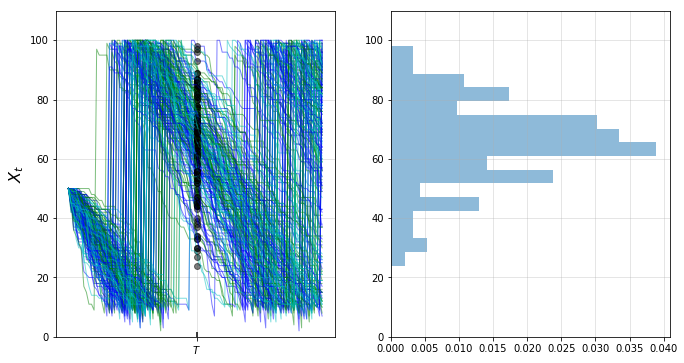

In [8]:
T = 50
M = 200

ymin, ymax = 0, S + 10

fig, axes = plt.subplots(1, 2, figsize=(11, 6))

for ax in axes:
    ax.grid(alpha=0.4)

ax = axes[0]

ax.set_ylim(ymin, ymax)
ax.set_ylabel('$X_t$', fontsize=16)
ax.vlines((T,), -1.5, 1.5)

ax.set_xticks((T,))
ax.set_xticklabels((r'$T$',))

sample = np.empty(M)
for m in range(M):
    rcolor = random.choice(('c', 'g', 'b'))
    X = sim_inventory_path(sim_length=2 * T)
    ax.plot(X, color=rcolor, lw=1, alpha=0.5)
    ax.plot((T,), (X[T+1],), 'ko', alpha=0.5)
    sample[m] = X[T+1]

axes[1].set_ylim(ymin, ymax)

axes[1].hist(sample, 
             bins=16, 
             density=True, 
             orientation='horizontal', 
             histtype='bar',
             alpha=0.5)

plt.show()

We can build up a clearer picture by drawing more samples

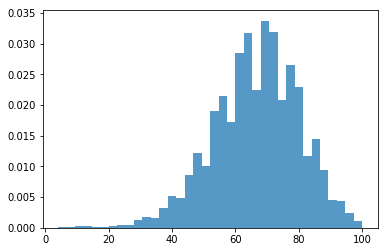

In [9]:
T = 50
M = 50_000

fig, ax = plt.subplots()

sample = np.empty(M)
for m in range(M):
    X = sim_inventory_path(sim_length=T+1)
    sample[m] = X[T]

ax.hist(sample, 
         bins=36, 
         density=True, 
         histtype='bar',
         alpha=0.75)

plt.show()

We can also approximate the distribution using a kernel density estimator.  I'll use one from Scikit Learn.



In [10]:
from sklearn.neighbors import KernelDensity

def plot_kde(sample, ax, label=''):
    
    xmin, xmax = 0.9 * min(sample), 1.1 * max(sample)
    xgrid = np.linspace(xmin, xmax, 200)
    kde = KernelDensity(kernel='gaussian').fit(sample[:, None])
    log_dens = kde.score_samples(xgrid[:, None])

    ax.plot(xgrid, np.exp(log_dens), label=label)

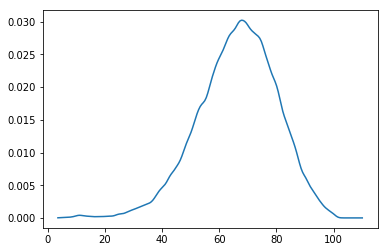

In [11]:
fig, ax = plt.subplots()
plot_kde(sample, ax)
plt.show()

### Asymptotic Stationarity and Ergodicity

This model is asymptotically stationary, with a unique stationary distribution.  

In particular, the sequence of marginal distributions $\{\psi_t\}$ is converging to a unique limiting distribution that does not depend on initial conditions.

### Exercise

Generate and plot the sequence $\{\psi_t\}$ at times $t = 10, 50, 200, 300, 400$ using the code above.

You should see convergence.  Try different initial conditions to verify that, in the long run, the distribution is invariant across initial conditions.

In [12]:
for i in range(40):
    print("solution below!")

solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!


#### Solution

Here's one possible solution:

In [13]:
M = 50_000  # Number of paths
T = 501
X = np.empty((M, T))

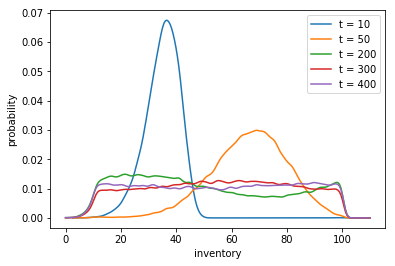

In [14]:
for m in range(M):
    X[m, :] = sim_inventory_path(sim_length=T)

fig, ax = plt.subplots()
sample_dates = 10, 50, 200, 300, 400

for t in sample_dates:
    plot_kde(X[:, t], ax, label=f't = {t}')

ax.set_xlabel('inventory')
ax.set_ylabel('probability')
ax.legend()
plt.show()

Notice that by $t=300$ or $t=400$ the densities are barely changing.

We have reached a good approximation of the stationary density.

You can convince yourself that initial conditions don't matter by testing a few of them.

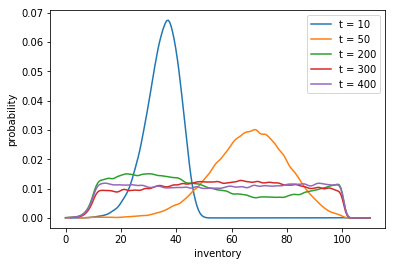

In [15]:
for m in range(M):
    X[m, :] = sim_inventory_path(sim_length=T, initial_x=80)

fig, ax = plt.subplots()
sample_dates = 10, 50, 200, 300, 400

for t in sample_dates:
    plot_kde(X[:, t], ax, label=f't = {t}')

ax.set_xlabel('inventory')
ax.set_ylabel('probability')
ax.legend()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYsAAAEKCAYAAADjDHn2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3Xl41NW9+PH3mX0my2SF7JCQsIOIAdx33Kp4VVS0Ve61rfv1tv5urd1sbbXaamu12sWrFrR1q1SlirghKC5AEJBNtgTIZCF7ZrLMfn5/fCchhIQMZCYzCef1PPMk813PZJnPnO1zhJQSRVEURTkSXawLoCiKosQ/FSwURVGUAalgoSiKogxIBQtFURRlQCpYKIqiKANSwUJRFEUZkAoWiqIoyoBUsFAURVEGFNVgIYS4SAixQwixWwhxbx/7zUKIV0L71wghxoa2f1MIsbHHIyiEmBHNsiqKoij9E9GawS2E0AM7gbmAA1gHXCel3NbjmNuB6VLKW4UQC4ArpJTX9rrONOBNKWXRke6XkZEhx44dG+FXoSiKMrKtX7++QUqZOdBxhiiWYTawW0pZDiCEeBm4HNjW45jLgV+Evn8NeFIIIeShEew64KWBbjZ27FjKysoiUW5FUZTjhhBiXzjHRbMZKheo7PHcEdrW5zFSSj/QCqT3OuZawggWiqIoSvREM1iIPrb1bvM64jFCiDlAh5RyS583EOJmIUSZEKKsvr7+2EuqKIqiHFE0g4UDyO/xPA+o7u8YIYQBsANNPfYv4Ai1Cinl01LKUillaWbmgE1uiqIoyjGKZp/FOqBECFEIVKG98V/f65ilwELgc2A+sKKrv0IIoQOuBs6MYhkVRRkhfD4fDocDt9sd66LEJYvFQl5eHkaj8ZjOj1qwkFL6hRB3Au8CeuA5KeVWIcQvgTIp5VLgWeAFIcRutBrFgh6XOBNwdHWQK4qiHInD4SApKYmxY8ciRF8t3McvKSWNjY04HA4KCwuP6RrRrFkgpVwGLOu17b4e37vRag99nbsSODma5VMUZeRwu90qUPRDCEF6ejqD6dtVM7gVRRkxVKDo32B/NlGtWSjKsWpq9/LZngZcbj8LZuWrNwFFiTFVs1DiTlO7lwseW8WdL27gR//azCvrKgc+SVFirKWlhT/96U8RudbHH3/MzJkzMRgMvPbaa4fsW7x4MSUlJZSUlLB48eKI3C8cKlgoceeRd3fQ3OHj+Ztmc0pROg+8vR1Hc0esi6UoRxTJYFFQUMCiRYu4/vpDB5A2NTVx//33s2bNGtauXcv9999Pc3NzRO45EBUslLiypaqVl9ftZ+EpYzlzfCa/nT+doJQ8/sGuWBdNUY7o3nvvZc+ePcyYMYMf/OAHg7rW2LFjmT59OjrdoW/R7777LnPnziUtLY3U1FTmzp3L8uXLB3WvcKk+CyWuPLu6gkSzge/NLQEgP83GRVOzeHdrLQ9eMQ2TQX2+UQZ2/7+3sq3aGdFrTs5J5ueXTel3/8MPP8yWLVvYuHFjn/vPOOMMXC7XYdsfffRRzj///LDKUFVVRX7+wbnOeXl5VFVVhXXuYKlgocSN1k4fyzbXcHVpHsmWgxOHLp2ezb++rGL17nrOnTg6hiVUlGP3ySefDPoafWUJH6rBHypYKHFj6aZqPP4g15TmH7L99OJMki0G3tpUo4KFEpYj1QBiJRI1i7y8PFauXNn93OFwcPbZZ0eohEemgoUSN15dV8nErCSm5doP2W4y6LhwShbvbKnF4w9gNuhjVEJF6V9SUlKfwaBLJGoWF154IT/+8Y+7O7Xfe+89HnrooUFfNxyqAViJC3sb2tlc1cr8k/L6rFafP3k0bR4/mypbY1A6RRlYeno6p512GlOnTh10B/e6devIy8vjn//8J7fccgtTpmg1pbS0NH72s58xa9YsZs2axX333UdaWlokij8gVbNQ4sLyrbUAXDQ1q8/9s8dq/xBryhuZXTg0/xyKcrRefPHFiFxn1qxZOByOPvfddNNN3HTTTRG5z9FQNQslLryzpZbpeXbyUm197k9NMDExK4k1FU197lcUJbpUsFBirrqlk02VLf3WKrrMKUxj/b5mfIHgEJVMUZQuKlgoMfdeVxPUlCMHi5OL0un0BfjKofotFGWoqWChxNxHO+opykygKDPxiMd19VWsqWgcimIpitKDChZKTLl9Ab4ob+Ss8QMvi5ueaKYoI4EN+1uGoGSKovSkgoUSU5+XN+LxBzl7wqiwjp+eZ2ezaoZSlCGngoUSU6t21GMx6pgT5nDYaXkp1Drd1DnVOstKfIlk1tlFixaRmZnJjBkzmDFjBs8880z3vlilKFfzLJSYWrWznpOL0rEYw5uVPT1Pm929uaqV85It0SyaohyVrmBx++23R+R61157LU8++eQh27pSlJeVlSGE4KSTTmLevHmkpqZG5J5HomoWSszUtHZS0dDOGSUD91d0mZydjE6gRkQpcSeSKcr7M2JTlAshLgIeB/TAM1LKh3vtNwPPAycBjcC1Usq9oX3Tgb8CyUAQmCWlVG0PI8iacm2CXbhNUAAJZgPFoxLZXKWChXIE79wLtZsje82saXDxw/3ujnSK8iVLlvDxxx8zfvx4HnvsMfLz80dminIhhB54CpgLOIB1QoilUsptPQ77NtAspSwWQiwAfgNcK4QwAH8HbpBSbhJCpAO+aJVViY01FY0kWQxMyk4+qvOm5aawamc9Ukq1NrcybBxNIsHLLruM6667DrPZzF/+8hcWLlzIihUrRmyK8tnAbillOYAQ4mXgcqBnsLgc+EXo+9eAJ4X2yi8AvpJSbgKQUqqB9SPQF+VNzClMQ687uj/26Xl2lnzp4IDTQ5Zd9VsofThCDSBWjqZmkZ6e3v39d7/7XX74wx8CIzdFeS5Q2eO5A5jT3zFSSr8QohVIB8YDUgjxLpAJvCyl/G0Uy6oMsTqnm4qGdq6fXXDU507ISgLg61qnChZK3IhkivKamhqys7MBWLp0KZMmTQJim6I8msGir4+LvetQ/R1jAE4HZgEdwIdCiPVSyg8POVmIm4GbQVvgXBk+vgglBJxTdPQZZCeGgsXOA66w52coSrT1TFF+8cUX88gjjxzztZ544gmWLl2KwWAgLS2NRYsWAYemKAdGTIpyB9BzybM8oLqfYxyhfgo70BTavkpK2QAghFgGzAQOCRZSyqeBpwFKS0sPb8xT4taX+5qxmfRMPsr+CoAUm4nRyWa+ru3/U5yixEKkUpQ/9NBD/dYYRmKK8nVAiRCiUAhhAhYAS3sdsxRYGPp+PrBCaj047wLThRC2UBA5i0P7OpRhbkNlC9Ny7Rj0x/YnOH50EjtUsFCUIRO1YCGl9AN3or3xbwdelVJuFUL8UggxL3TYs0C6EGI3cDdwb+jcZuD3aAFnI/CllPLtaJVVGVoef4Dt1U5mFKQc8zUmZiWxq66NQFBVKBVlKER1noWUchmwrNe2+3p87wau7ufcv6MNn1VGmG3VTryBICfmH3uwmJCVjNcfZG9jO+MGyFarKMrgqRncypDbWKlljZ2Rf+wpCro6uVVTlKIMDRUslCG3qbKF0cnmQQ17LR6ViE6gOrkVZYioYKEMuY2VLcwYRBMUgMWopyDNxp66tgiVSlGUI1HBQhlSTrePvY0dTM8bXLAAKMpMZE+9ChZKfIhkivLf//73TJ48menTp3Peeeexb9++7n39pShfv34906ZNo7i4mLvuuqvP1CCDoYKFMqS+rtGajY5lfkVvRRkJ7G1sJ6hGRClxIJLB4sQTT6SsrIyvvvqK+fPnc8899wAHU5SvWbOGtWvXcv/993fP5r7tttt4+umn2bVrF7t27Yp4NloVLJQhtb3GCXDUyQP7UpSZiNsXpLq1c9DXUpTBimSK8nPOOQebzQbAySefjMPhAPpPUV5TU4PT6eSUU05BCMGNN97IG2+8MejX1JNa/EgZUttrnKTajIxONg/6WkWZCQCU17eTl2ob9PWUkeM3a3/D101fR/SaE9Mm8sPZP+x3f6RTlHd59tlnufjiiwH6TVFeVVVFXl7eYdsjSQULZUhtr3EyKTs5ImmVDwaLNs4cH/4CSooSC0eTSLDL3//+d8rKyli1ahVAvynKhyJ1uQoWypDxB4J8XevihpPHROR6mYlmkswGyhvaI3I9ZeQ4Ug0gVo62ZvHBBx/w4IMPsmrVKsxmrSbeX4ryvLy87qaqru05OTkRLb8KFsqQ2dvYjscfjEh/BWifnIoyEyivV8FCib1IpijfsGEDt9xyC8uXL2fUqIOZlftLUZ6WlkZSUhJffPEFc+bM4fnnn+e///u/j/3F9EF1cCtDZltoJFSkggVondzlavisEgd6pigfbAf3D37wA9ra2rj66quZMWMG8+Zp6fR6piifNWvWISnK//znP/Od73yH4uJixo0b193PESmqZqEMme01Tox6QfGoyOVyKspI4PUNVXR4/dhM6s9Zia1IpSj/4IMP+t3XX4ry0tJStmzZEpH790XVLJQhs73GybjMREyGyP3Zjc3QOrn3N3VE7JqKohxOBQtlyGyvcUZkMl5PY9K1IbP7G1WwUJRoUsFCGRJN7V4OOD0R7a8AKEgLBQtVs1CUqFLBQhkSkZy53VOKzUSyxaCChaJEmQoWypA4GCySIn7tgnQb+1QzlKJElQoWypDYVuNkVJKZ9MTBp/norSDNRqWqWShKVKlgoQyJ7TWuiDdBdSlIS8DR3KnW41ZiKpJZZ//yl78wbdo0ZsyYwemnn862bdu69z300EMUFxczYcIE3n333e7ty5cvZ8KECRQXF/Pwww9HpBw9qWChRJ0vEGR3nYuJUWiCAq1m4Q0EqXW6o3J9RQlHJIPF9ddfz+bNm9m4cSP33HMPd999NwDbtm3j5ZdfZuvWrSxfvpzbb7+dQCBAIBDgjjvu4J133mHbtm289NJLhwSYSFDBQom6fY3t+AKSCaOjFyxADZ9VYiuSKcqTkw/Wwtvb27uTAr755pssWLAAs9lMYWEhxcXFrF27lrVr11JcXExRUREmk4kFCxbw5ptvDqoMvUV1yqsQ4iLgcUAPPCOlfLjXfjPwPHAS0AhcK6XcK4QYC2wHdoQO/UJKeWs0y6pEz84DWjqO8VEKFt1zLZraOWVcelTuoQwvtb/+NZ7tkU1Rbp40kawf/7jf/ZFOUf7UU0/x+9//Hq/Xy4oVKwAtRfnJJ5/cfUzPVOS9U5evWbMmvBcWpqgFCyGEHngKmAs4gHVCiKVSyp51o28DzVLKYiHEAuA3wLWhfXuklDOiVT5l6Ow84EIIGJcZuTQfPWXbLRh0Qo2IUuLa0aYov+OOO7jjjjt48cUXeeCBB1i8eHG/qciDwWCf2yMpmjWL2cBuKWU5gBDiZeByoGewuBz4Rej714AnRaRfoRJzu+rayE+1YTXpo3J9g15HdoqFqha1Yp6iOVINIFaOdfGjBQsWcNtttwFajaGysrJ7X89U5P1tj5RoBotcoLLHcwcwp79jpJR+IUQr0NWOUCiE2AA4gZ9KKQ8Ly0KIm4GbAQoKCiJbeiVidh1wMX50dGoVXXLsVqpVsFBiKJIpynft2kVJSQkAb7/9dvf38+bN4/rrr+fuu++murqaXbt2MXv2bKSU7Nq1i4qKCnJzc3n55ZcjltSwSzSDRV81hN51qP6OqQEKpJSNQoiTgDeEEFOklM5DDpTyaeBpgNLSUjVuMg75AkEqGto5b9LoqN4nN8XKmoqmqN5DUY6kZ4ryiy++mEceeeSYr/Xkk0/ywQcfYDQaSU1NZfHixQBMmTKFa665hsmTJ2MwGHjqqafQ6/Xd51x44YUEAgFuuukmpkyZEpHX1SWawcIB5Pd4ngdU93OMQwhhAOxAk9Qa5jwAUsr1Qog9wHigLIrlVaKgayRUSQTTkvclJ8VKrdONPxDEoFeD/JTYiNSn+ccff7zffT/5yU/4yU9+ctj2Sy65hEsuuSQi9+9LNP+r1gElQohCIYQJWAAs7XXMUmBh6Pv5wAoppRRCZIY6yBFCFAElQHkUy6pESbRHQnXJSbESCErqXJ6o3kdRjldRq1mE+iDuBN5FGzr7nJRyqxDil0CZlHIp8CzwghBiN9CEFlAAzgR+KYTwAwHgVimlamMYhqI9EqpLTooFgOqWTnJSrFG9l6Icj6I6z0JKuQxY1mvbfT2+dwNX93HeEmBJNMumDI1oj4TqkhsKEFUtnZRG9U6KcnxSjbtKVA3FSCiA7FCwqG5RKT8UJRpUsFCipmskVEmU+ysAEs0G7FajGj6rKFGigoUSNUM1EqpLToqaa6Eo0aKChRI1QzUSqkuumsWtxFAks852ee211xBCUFZ2cNaASlGujDhDNRKqi6pZKLEU6WDhcrl44oknmDPnYOILlaJcGZGGaiRUl5wUK063H5fbNyT3U5SeIpmiHOBnP/sZ99xzDxaLpXvbiE1RrhzfhmokVJeu+RU1rW6SLMYhu68Sfz55dScNlW0RvWZGfiJnXDO+3/2RTFG+YcMGKisrufTSS3n00Ue7t4/IFOXK8W2ockL1lBuamFfV0jlk/SSKEq5wEwkGg0G+//3vs2jRosP2jdQU5cpxbKhHQsHBmoXqt1COVAOIlXBrFi6Xiy1btnD22WcDUFtby7x581i6dOmITVGuHMeGeiQUwKgkC3qdUMFCiYlIpSi32+00NDR0Pz/77LN59NFHKS0txWq1jsgU5cpxbKhHQgHodYKsZIuaxa3ERCRTlPdnpKYoV45jQz0SqktuilXNtVBiJtKf5gFWrlx5yPORmKJcOY4N9UioLjkpFtUMpShRoIKFEnFdI6GKRw39iKScFCu1rW4CQbVwoqJEkgoWSsR1jYSKTc3Cij8oqVeLIB2X+hpaqmgG+7NRwUKJuFiMhOpycF2LjiG/txJbFouFxsZGFTD6IKWksbHxkNngR0t1cCsRF4uRUF1yuoOFm5PGDPntlRjKy8vD4XBQX18f66LEJYvFQl5e3jGfH1awEELopZSBY76LclzZdaCNgrShHwkFhy6vqhxfjEYjhYWFsS7GiBVuM9RuIcQjQojJUS2NMiLsOOCKWbqNJIuRJItBBQtFibBwg8V0YCfwjBDiCyHEzUKI5CiWSxmmPP4AFQ3tTIhhbqYcu5WaVjUxT1EiKaxgIaV0SSn/T0p5KnAP8HOgRgixWAhR3N95QoiLhBA7hBC7hRD39rHfLIR4JbR/jRBibK/9BUKINiHE/x7Vq1JipqKhnUBQUhKDkVBdsuwWalWwUJSICitYCCH0Qoh5QojXgceB3wFFwL+BZf2dAzwFXAxMBq7roxnr20CzlLIYeAz4Ta/9jwHvhPlalDiwo1bLjTMhK3Y1i2y7RdUsFCXCwh0NtQv4CHhESvlZj+2vCSHO7Oec2cBuKWU5gBDiZeByoOfyTZcDv+i6FvCkEEJIKaUQ4j+AcqA9zDIqcWDnARcGnaAoI3Y1i2y7lYY2Dx5/ALNh6DvZFWUkCrfP4kYp5bd7BgohxGkAUsq7+jknF6js8dwR2tbnMVJKP9AKpAshEoAfAveHWT4lTuyobaMwIwGTIXZTeLLt2oioOqeamKcokRLuf/QTfWz74wDn9LXyRu/ZMv0dcz/wmJTyiEtdhTray4QQZWpsdXzYVRe7kVBdskLBQjVFKUrkHLEZSghxCnAqkCmEuLvHrmRgoPq9A8jv8TwPqO7nGIcQwgDYgSZgDjBfCPFbIAUICiHcUsone54spXwaeBqgtLRUTduMsQ6vn/1NHVx54rFP/ImE7O5goYbPKkqkDNRnYQISQ8f1/LjoBOYPcO46oEQIUQhUAQuA63sdsxRYCHweut4Kqc3VP6PrACHEL4C23oFCiT+769qQEiZkxa6/Ag7WLNSIKEWJnCMGCynlKmCVEGKRlHLf0VxYSukXQtwJvItWC3lOSrlVCPFLoExKuRR4FnhBCLEbrUax4JhehRIXYpkTqqcki5Eks0E1QylKBA3UDPUHKeX30EYpHdbMI6Wcd6TzpZTL6DW0Vkp5X4/v3cDVA1zjF0far8SPnQdcmAw6xqQnxLooZNktqhlKUSJooGaoF0JfH412QZThb0eti+LMRPS6vsYtDC01MU9RImugZqj1oa+rhqY4ynC284CLk4vSY10MQOvk7pogqCjK4A3UDLWZw4e7dpNSTo94iZRhyen2UdPqjnl/RZcsu5X6Ng++QBCjXi3boiiDNVAz1KVDUgpl2Nt1QPsUH4vV8fqSbbcgJdS5PN0LIimKcuwGaoY6qhFQyvFrR218jITqkt09fLZTBQtFiYAj1s+FEKtDX11CCGfvr0NTRGU42FHrJMGkj5s35my7Vo7qFtXJrSiRMFDN4vTQ1/j4uKjEre01LiZmJ6OLg5FQoCbmKUqkhb0GtxBiJnA6Wof3ainlhqiVShlWpJRsr3Vy+YycWBelW7LFgM2kVxPzFCVCwl3P4j5gMZAOZACLhBA/jWbBlOHD0dyJy+1nUnb8LJ4ohNDmWjjVxDxFiYRwaxbXASeGZlwjhHgY+BJ4IFoFU4aP7TVa91U8BQtQiyApSiSFOwB9L2Dp8dwM7Il4aZRhaXuNCyFgYgxXx+tLtt2q+iwUJUIGmpT3R7Q+Cg+wVQjxfuj5XGB19IunDAfba5yMTU/AZgq7C2xIZNstHHC68QeCGNTEPEUZlIH+u8tCX9cDr/fYvjIqpVGGpe21TqbkxFcTFGgjooIS6ts83UNpFUU5NgMNnV08VAVRhqc2j599jR3MnxnbBY/6kt1jxTwVLBRlcMJqNxBClAAPAZPp0XchpSyKUrmUYWJHbXx2bgNkJWsBQvVbKMrghduQ+zfgz4AfOAd4noPpy5Xj2LYaLSfUpDhshspWa3ErSsSEGyysUsoPASGl3BdakOjc6BVLGS621zhJthjIsVsGPniIpdiMWIw6atUiSIoyaOEOX3ELIXTArtBSqVXAqOgVSxkuttc4mZSdjBDxkeajJyEE2XYr1apmoSiDFm7N4nuADbgLOAm4AVgYrUIpw0MwKNlR64rL/oouWclqxTxFiYSwahZSynUAodrFXVJKtQSZwr6mDjq8ASbHcbDItltYU9EU62IoyrAXbm6o0tCqeV8Bm4UQm4QQJ4Vx3kVCiB1CiN1CiHv72G8WQrwS2r9GCDE2tH22EGJj6LFJCHHF0b0sZSjEa5qPnrJCE/MCwX4XfFQUJQzhNkM9B9wupRwrpRwL3IE2QqpfQgg98BRwMdqQ2+uEEJN7HfZtoFlKWQw8BvwmtH0LUCqlnAFcBPxVCBFf04MVttc40esEJXGyOl5fslOs+IOSxjZPrIuiKMNauMHCJaX8pOuJlHI1MFBT1Gxgt5SyXErpBV4GLu91zOVo2WwBXgPOE0IIKWWHlNIf2m7hCOuAK7GztdrJuMwELEZ9rIvSr+xkNXy2T75O6GyJdSmUYWSg3FAzQ9+uFUL8FXgJ7Y37WgZO+ZELVPZ47gDm9HeMlNIvhGhFS4PeIISYg1ajGQPc0CN4KHFia3Urp47LiHUxjiire65FJyfkp8S4NDHmbYdNL8Pap6H+a23bpHkw935IU/NrlSMbqGnnd72e/7zH9wN92u9rLGXvc/o9Rkq5BpgihJgELBZCvNOVIr37ZCFuBm4GKCgoGKA4SiQ1tHk44PTEZU6ono77iXluJ9Rsgu3/hq9eAXcLZM+Ac3+q7St7DvauhoX/hqypsS6tEscGyg11ziCu7QDyezzPA6r7OcYR6pOwA4cMXZFSbhdCtANTOZjYsGvf08DTAKWlpaqpaghtrdY6tyfHebBISzBh0uuOn+GzbidsewN2vacFiZb92na9GSZcDCffBvlzoGtezEn/CYsv0x4Ll0LWtJgVXYlv4eaGsqPVKs4MbVoF/FJK2XqE09YBJUKIQrRJfAuA63sdsxRtvsbnwHxghZRShs6pDDVNjQEmoK2pocSJrdXar35Ktj3GJTmyrhXzRnzNQkrY9BK8fx+010NyHuTPhpkLYfRUGHsamPtYbyR9HPznW7AoFDCuf1U7T1F6CXeE0XNoI5SuCT2/AW001JX9nRB6o78TeBfQA89JKbcKIX4JlEkplwLPAi8IIXaj1SgWhE4/HbhXCOEDgmgjsRqO7qUp0bS12kleqhW7zRjrogwo2z7CJ+b5vbDsf+HLxVqt4dp/aG/44c6qTyvSAsbiy+DZuTD+Ysgo1vbpDJB9ApRcAKaE6L0GJe6FGyzGSSmv6vH8fiHExoFOklIuA5b12nZfj+/dwNV9nPcCKlFhXNteHZ9rWPQl225h/f7mWBcjOjqa4JUbYN9qOP1uOPdnoDuGhZ7SCuG2T+HTJ7S+jfKV2vagH4I+sBfAZY9B8fkRLb4yfIQbLDqFEKeHhswihDgNUNnZjlPtHj8Vje38x4m5sS5KWLLsVg601hIMSnS6+Mthdcz2fQav3wKuA3DF03DCtYO7nsUO5/1Me3Txe7VA9M698Pf5MO+PMPOGwd1HGZbCDRa3As+H+i4AmlG5oY5b22ucSElcp/noKdtuwRsI0tjuJTPJHOviDJ7fAysegM/+CKlj4L+WQV5pdO5lMMG4c+GWVfDyN2HpnYCEmTdG535K3BowWITyQU2QUp4ghEgGkFI6o14yJW51jYSakjs8gkXXXIvaVvfwDxY1X2m1ibptcNJ/wQUPgHkIZtAbrbDgRXj5evj3/4A1FSZdFv37KnFjwMZNKWUQuDP0vVMFCmVrdStpCSaykuNvDYu+ZPeYmDesffkC/N+50NEI1/8TLvvD0ASKLkYLXPsC5MyE174NFZ8MfI4yYoTbE/a+EOJ/hRD5Qoi0rkdUS6bEra2hzu14XMOiL13rb9c6h/GIqE9+pzUBFZ4Bt38B4y+ITTlMCfDNf2od4i9dB9UDjnNRRohwg8VNwO1o8yvKejyU44zXH2TnAVfcT8brKT3BhFEvhu9ci3XPwIe/hGnXaPMgbDH+nGZLg2/9C6wp8PeroHFPbMujDIlwg8VktAyym4CNwB+BKdEqlBK/dtW58AUkU3LiezJeTzqdYPRwXQSpfCW8/b8w/iL4jz+DPk7mtdhz4YY3AAkv/Ac4a2JdIiXKwg0Wi4FJwBNogWISB7PFKseR7s6Th9wyAAAgAElEQVTtYVSzAK3forplmPVZdDbD67dBRgnMfw70cZalP6MYvrVEm+vx9ytVFtsRLtxgMUFK+R0p5Uehx81oKTiU48zWqlZsJj1j04fXbN4su3X49Vm8/b/QXgdXPh2/s6dzTtRGSTXshLf/X6xLo0RRuMFigxDi5K4nofThn0anSEo82+hoZVquHf0wm9yWE8oPJeUwyTe5+TXY8hqcfa/2hhzPis6Cs+7Vyrv5tViXRomScIPFHOAzIcReIcRetMR/ZwkhNgshvopa6ZS44vEH2F7tZMYwXBciy27B6w/S3OGLdVEG1loFb98NebPhtO/HujThOf37kDdLK3erI9alUaIg3EbQi6JaCmVY+LrGhTcQHJaLCPWca5GWYIpxaY4gGIQ3boOAH674S/z1U/RHb4Ar/gp/OQPeuF3r/D6WHFVK3Arrtyml3HekR7QLqcSHTQ6tA3M4BousrrkW8T4iau1foWIVXPRrLX34cJI+Tit3xSrtdSgjigr9Stg2VbaSkWgmxz48Zm731FWzqI7nYFH3Nbz/c22Y7Mxhmnpt5kKt/O//HOq2x7o0SgSpYKGEbZOjhRn59mEzc7unjEQzBp2gNl5Tfvg98K/vauk75v0x/LUo4o0QWvnNSfDqQnAfaX00ZThRwUIJS2unjz31bUzPG35NUAD60MS8uJ3F/c4PofYr7Y02cVSsSzM4iaPg6r9B0x4tYASGwaACZUAqWChh+XJ/M1JC6djUWBflmGXF64p56xfD+r9pI4omfiPWpYmMwjPhsseh/CNY9gNt2VdlWFPBQglL2d4mDDoxLIfNdonLYOEo05ZEHXeutsrdSHLit7QAuP5v8MWfYl0aZZBUsFDCsq6imSm5dmymYTKUsw/ZyXE2Ma+tXlsSNSkLrnoWdPpYlyjyzr0PJs2Dd38CXy8b+HglbqlgoQzI4w+w0dHCrDHDtwkKtJpFpy9Aa2cctKEHA7Dk29DZBNf+I/aZZKNFp9PmX+ScqL3epopYl0g5RipYKAPaUtWK1x+kdOzwfkPrWtciLjq5Vz6kzUe45FHInh7r0kSXyQbX/h2EDt65R/VfDFNRDRZCiIuEEDuEELuFEPf2sd8shHgltH+NEGJsaPtcIcT6UDqR9UKIc6NZTuXI1u1tBmDWMO7cBshOObi8akzteh8+fkRr0595Q2zLMlTsuXDOj2HXe/D1W7EujXIMohYshBB6tDUwLkZbD+M6IcTkXod9G2iWUhYDjwG/CW1vAC6TUk4DFgIvRKucysA+29NI8ahE0hOH9/rVB1N+xDBYNO6BJd+B0dO0WsXxZPYtkDkJPviFls5EGVaiWbOYDeyWUpZLKb3Ay8DlvY65nIPrYrwGnCeEEFLKDVLK6tD2rYBFCDG836mGKY8/wNqKRk4vzoh1UQYtM9GMThC7iXkdTfCPq7WO7GtfAKM1NuWIFb0Bzv0pNO6GTS/FujTKUYpmsMgFKns8d4S29XmMlNIPtALpvY65CtggpfT0voEQ4mYhRJkQoqy+vj5iBVcO+nJfC25fcEQEC4Nex6ikGE3Ma62CRd+A1kpt/Ye0wqEvQzyY+A3ImQmrfqPNWleGjWgGi77yFfTu2TriMUKIKWhNU7f0dQMp5dNSylIpZWlmZuYxF1Tp36e7G9DrBHOKhnfndpcsewyCRf0OePYCaKmEb74GBScPfM5IJYRWu2ithPWLYl0a5ShEM1g4gPwez/OA6v6OEUIYADvQFHqeB7wO3CilVCvCx8jq3Q3MyE8hyRInaz8PUrbdQs1QNkNVrYfnLoSgD/5rmbZQ0PFu3Lkw5nT4+FHwtse6NEqYohks1gElQohCIYQJWAAs7XXMUrQObID5wAoppRRCpABvAz+SUqoV+WKktdPHV44WThsBTVBdsu3WoZuYV7sFXrgSzMnw7fdG/hDZcAkB5/1MWzJ27dOxLo0SpqgFi1AfxJ3Au8B24FUp5VYhxC+FEPNChz0LpAshdgN3A13Da+8EioGfCSE2hh7DPLva8PNFeSNByYjor+iSbbfQ4Q3g8kR5NE5bPfxjvrZ29sJ/Q+rY6N5vuCk4GYrnwuo/qMy0w0RUczdIKZcBy3ptu6/H927g6j7OewB4IJplUwb22e4GbCb9sM4H1VvXXIuq5k6Ss6PUtBYMwus3a6OfvvshpI6Jzn2Gu3N/Ck+fBZ89Cef+JNalUQagZnAr/Vq9u4E5hWmYDCPnz6QgzQZAZVNH9G6y5i+wZwVc/DBkTYvefYa7nBkw+XL4/CmVBmQYGDnvAkpE1bR2sqe+fUT1VwDkp4aCRXOUOrmbKmDFr6DkQjjpv6Jzj5Hkgge1eSev36rly1LilgoWSp8+3d0IMOKCRYrNSKLZEJ2ahZTw77tA6OHSx4bvandDKSVfm8le+QV89GCsS6McwfDNN61E1cc768lINDFhdFKsixJRQgjyUq3RCRbr/wYVH2uBwt57/qnSr+nXwN5P4JPfQXoxzLg+1iVS+qBqFsphAkHJJ7vqOXN8JjrdyPt0XJBmo7I5wsGipRLeu09bIU41Px0dIbQAW3gWLL0LKj6JdYmUPqhgoRxmc1UrzR0+zho/MmfF56fZqGzqjNxcCynh3/8DMqitoa2an46e3gjXPA9pRfDKt6BhV6xLpPSigoVymJU76hACziwZocEi1UqnL0BDmzcyF9z4D9jzIZz/CzWfYjCsKfDNV0Fn0BIutjfGukRKDypYKIdZtbOeE/JSSE0wxbooUZHfNXw2Ek1RDbvgnR/CmNNg1ncGf73jXepYuO4lcFbDPxeqEVJxRHVwHyd8AR/ratfxwf4P2NKwhRZPCzaDjQxbBqOso8hNymVM8hhSjTlsdNTzP+f2XnpEEwgG2FS/iQ11GyhvLafZ3YzL6+p+tPvb8QV8WI1WMiwZlKSWMGPUDE7OPpkiexEiDppo8nvMtZhZMIgFnbwd8M//BL0Jrvw/bQlRZfDyZ8Nlf4A3boPPn4TT/ifWJVJQwWJE8wQ8rK5azQf7PmCVYxUurwurwcrMUTMpSS2h3ddOfWc96w6s463yt5ChhL8JJQa+6JjBc1vOYEr6FNIsaThcDj6r/owP9n9AQ2cDAKNso0i3pJNsSiYzJZMkUxI2gw2jzkinv5Pajlo21W9i+d7lAGRYM5idNZuTRp9Eob2QUbZRpJhTSDQmotfph+zn0jXXwjGYuRbBILxxKxzYCt/8pxr9FGknXAc7lsGKB2DceZA1NdYlOu6pYDHCSClZf2A9b5W/xXt738Plc2E32zk3/1zOH3M+J2efjMVgOew8T8CDw+Xg5+98xFcNG/CkVfPY+scOOcait3BG3hnMHTOXU3NOxW62h1Umh8vB2tq1rKlZw9ratSyrOCQDDALB6ITRFNmLKLIXUWgvpNBeSJG9iDRLWsRrI1aTnoxEM/saB5Hx9KMHYdubcMEDUDI3coVTNELApX+AP50Cr98C310BBrX+WSypYDGCrD+wnse/fJwNdRuwGWycP+Z8vlH4DWZnz8agO/Kv2qw3U5hcxNd7Kjh73Ek8cfmJNHQ2sKdlD03uJnIScyhJKcFmtB11ufKS8shLyuPKkiuRUlLdXs0+5z4aOxtp9bTS7Gmmqq2K8pZyltQtodN/8BO/3Ww/LIhkWjNJtaSSaknFrD+2N5DCDBt7G46xz2LTy/DJozDzRjjlzmO7hjKwhAxtdNlL18JHv4a598e6RMc1FSyGCU/Aw4a6Dexs2kmiKZGcxBzGJI1BCMHmhs0s2bmET6s/JdOayU/n/JR5xfOwGo5u2c5tNU4a2jzdQ2YzrBlkWCM7g1sIQW5iLrmJfTfbBGWQ2vZaKlorKG8t1x4t5azYv4JmT/Nhx1sNVnIScpiVNYvLxl3G9Mzw0oAXZSTy4dcHjv4F7Psclv43jD0DLvmdGiYbbRMughO/BZ89AVOu0PJJKTGhgkWcCsogO5t38kX1F3xe8zlfHvgSd6D/Fd7SLGncfdLdLJi44KiDRJeVO+oAODOG8yt0QkdOYg45iTmclnvaIfua3c3dNZJmTzPN7maaPc2Ut5bz5p43eXnHy8zOms2PZv+I4tTiI96nKDOBV8q8tHb6sFvDzD7bVAGvfBNSCrQ1tA0jc7RY3LngAdj1vhakv/uRtpa3MuTUTz2OBGWQ5RXLWelYyZqaNTS5mwAYZx/HVeOv4pTsU5iWOY1OfycOl4NKl7bEeUFSATNHzxywqWkg72+v44Q8O5lJ8dk23NX01Jd2XztLdi7h6c1Pc/VbV3PL9Fv4zrTv9PszKcpMBKC8vo0TwxkR5XbCSwu0oZzXvwrWQYyiihDvvn149+9H+nyYi4owFhQgRuKILGsqXPIIvHojfPGUGh0VIypYxImK1gp+svonbG7YTLolnVNyTuGU7FM4OftkRieMPuz43MRc5mTPidj9a1vdbKps4QcXTojYNYdSgjGBG6fcyKXjLuXhNQ/z1ManWF21modOf4j85PzDji/KTACgvL69z2AhpSTochFsawOdQP/uXegadsENr0P6uLDKJL1efDU1yEAQQ2YG+qTB5dkKer24t26lbeUqXB98gHfPoasN61NSsM2ahW3OHKzTp2HMz0efktLvAIFAWxue7dsJerzoU1KwTJqI0A/dqLSjMmkeTLxU67uYeGnYvwMlclSwiAONnY3c8v4tdPo7+fXpv+bSokuHfD7C+9u19vsLJh8emIaTNEsavz3rt5ydfzYPrHmAq/59FbeecCvXTriWBGNC93EFaTYMOkF5QxtSSjw7d9Gx5gvaP/8Cz+7d+Ovrke5Dm/2EOQ/Dx79Cn/YU+qQkpAxCUEIgoKUOCQS0bYEg/sZG/AcOaENsQyzTppF88cWkXHkF+pS+F5SSPh++qiq8lZV49+3Hu38fvn378Toc+EK1CPR6bKWlpC5YgGXKFIReh2fXLjrWf0nHmjW43n+/+3q6xESM+fmY8nLRZ2QgjEYCzS24t2/Du6dcS1USok9JIWnuXOyXz8N6wgkIo/Fgmaqr8e7fj3efVga93Y6pIB9TYSH6tMiPWDuMEFrt4qk58Nb34Malqr9oiIkhWYt4CJSWlsqysrJYF+Oo+YN+bnr3JrY3bmfRxYuYkj4Fr9tP3V4nTTXtdDi9BHxBrEkm0nMTyS62Y7JEPsbf8OwaHM2drPh/Z8XFxLnBCLS04G9ooMHdyEOVf2NV3afYDDYmp08m05qJCARJrm+n5eNqZta4mVbdhL6lDQBjQT7WqdMwjB6NITMTXesOWL+YQOYsAqNOxd/cRKCpmaDLpU3C0+sQOj3odFoTkF4POoEhJQVjbh7GvDyE0YC3spK2j1bi3rwZYTKRcMopWKZPQxhN+GtrQoFhP77qaggcnLWss9kwFhRgys/HNKYAy/Tp2GbNwpDafzOY1+HAs3MnvspKvJUOvJX78TmqCDQ2Ir1edCl2zCUlWKdPxzptGrrERHzVNbSt0mossrMTYbViGJUJ/gC+2tpDytSbLjERnc2GMBoRJhPCaMSQmUnCaaeRfNGFGHNyIvfLXfcsvH03XP6U1vF9lDqcXhw7mmhr8hAMSJLSLdgzrdhHWbEmHp99UEKI9VLK0gGPU8Eitt7c/SY//fSnPHj6g5QGz2T98n04djQR9Gu/F6ET6PUCvy/Y/Xz02CSyi1PIKrKTVWTHljy4P/LWDh+lD77Pf51WyI8vmTTo1zTUpJT4a2txrViBa/m7dJSVHfzErNMhszOpS9Xh8reT0OIms96LIfTe15QIW8YItowVbBkjcKVZGG0bTYY1gxNt2Zy95gVOyJyOuOHNiHRou3fsoGXJEto+WomvUutz0iUnYxozBlN+PsYxBZgKxmAaU4CpoAB9evqQBu9AWzvtq1fTsX49geZmEAJjXi6m/AJMYwow5uejs1oJNDVpNY2KCrz7K5EeN9LrQ/q8SJ8PT0UF3t17QAgSTjuNlKuuJOGMM9EnJhAMShoqXdSWO2mt68DT4SfgD4YekmAgiD7ow2iQmJKt2NISMZh0+H1BXA2dOLeux9lpQySOwpZqo2ByGuNnjyY1K6Hf11W3z0nZsr1UbGro95gEu4mMgiQy8hKxZ1pJTLOQlGYhKdWC3nh4X1CHr4ON9RvZ1byLSWmTmJU1a1h+0FLBYhjwBXxc9sZlJBuTuc31S7Z9Uo0t2cT4OVnkT0wlPS8RW7IJIQTeTj8H9jqp2tGMY0cz9ftdBAPa786SYMSabEIGZfc/XTAgEQKMZj1Gs0H7atFjNOvRG3QEA9o/pd8XpLq2jZZmD3a9Dp1OYEs2kTI6gdTRNlKybCSlWwgGJH5vAJ8ngN8bwGjWk5qVwKgxSej0R9epKqXEX12Nv7kFYdBjKipCZzryG7GUEvfWbTjfWUbnxk34a2q0T/ZCEHS5CLS0AGAqHkfyBRdiLh6HDATxVlTgKS/v/sSuz0jHMn485uJinm+y8WS5i6Xfm0JtRy1VbVVUtVVR11FHTetetjZtxy8ExcmFXDPpOi4tupQkU+TW95B+P9LnQ2c9ttFrx6K1voOqnS0EAxJropGc8Sn9fqKWQYmn04/RpO/zzXIg3spKWl9/naZ/vYnLGaAlpYSWnBNpso3Fp9MmhurxYRI+9EhE0IfwucHjJigM+PVmAgYrPkNCd5NTQooJewok172HsOfSbC3lQEUrUkLBlDSmnZ1H/uQ09HodwUCQ/dua2Lyyiv1bGzHbDEw9K5eiGZmkZiUgBLia3LTWddJS10FDZRv1lS6aa9rp/bZos5swJevwiE46PFqAC7oFOqmnzdTCzsx1GE5w8tcL/tLnpNd4FhfBQghxEfA4oAeekVI+3Gu/GXgeOAloBK6VUu4VQqQDrwGzgEVSygFnPg3HYPHqjlf51ee/4kcdT9D8lWTG3AJmX1aI0TRwJ6PfF6B+fxsHKlppqeuk0+VFpxPoDTr0BoFOryMYlN1v7j7PwUfAF0Sn147RG3Vsb2rDRZDLZ2sdwe0tHloOdNBS29Fdo+mPNdlESekoxs/KYtTYpP47Uz0+Kt/6hJrVW2nZV4/f7cXkdZHY5iC1Yz8J06eScOaZJJ55BuYJExBCIP1+PDt30vbppziXLsWzazfCaMQyeTLGMQXahSXorFbMxeNIOPVUzMVHHjLb08tr93Pvvzbz8Q/OoSBdm2wopQRnDWLRJbS7m3nv/Ht4peYTtjZuxWqwcknhJVwz4Romp/edO+tYBfxBDlQ4qdvnxNXoRgYlyZlWMvOTyMhPxGzre3hvwB/E6/ZjsRkR/aw9IqVk3+ZGyt7Zy4EK52H7M/ITyR6Xgs1uwt3uo7Wuk9b6Tpz1nQT82u9fb9BhshmwJhqxJBixJGoPvU7gcfvpaPXS3uLRmk0D8pC+kIAv2P3UKjrJkAdI9zpI7diLub0B6fVAUKJPTsaQlYVp7BhMY8ags1rx1dbSvmYdbWVfItwdGOzJ2E45BYu5HnPTe1hvegLvlCvZ+kkVWz6uoqPVi96gIyHFRIfTi98bxJpk5ITz8pl2Vh4m68BNuAF/kLZmD431Tr7cs5nt+3bR1NCGuTMBfdAAAgw2SE1OJjs5G5rMNJR3UJ20m3HfMnLTCcNrPZOYBwshhB7YCcwFHMA64Dop5bYex9wOTJdS3iqEWABcIaW8VgiRAJwITAWmjsRgIaXkyqVXkls7mUkbzqP0G2OZc1nRkJejsqmDM377ET+4cAJ3nHPoG60MStpaPLia3OgNOowmPQazDqNZj6fDT/1+F7vX17F3cwNBv/bmVnRCBpljkjBZDPjcAep31FD15T4aXWYC+oOfYHVCEpTam5tR5yezfQ9p5Z+Q0rIbk+xEl5BA0OnsftOxzphB0uX/ge3cuQQtCaEAGNS+egP4vUGEAL1eh04v8HT66XR56XR56XD6CPgCZBYkkTcxjZTRWmDYsL+ZK5/6jN+fM5HURh/7tjTS4fRglB1kmsopOruU4vNLsSaa2NqwlVd3vsqy8mW4A26mpk/lmgnXMHfMXBJNiUf9c5dS4mxw4/i6iX1bGnHsaMbn1trGTBY9QifwdPi7j0/OtJKWZUNv0OHp9NPh9NLR6sXd7tN+nnpBWk4CeRNSyZuURnpOAgG/pGpHM5tXOWiobCMp3cL0c/IomJKO2WbA1ejG8XUzjq+bqNvvwucOYDDqSM60htrxbSTYTfi9QbydfjydftztPtxtPtztPjpdXoJBicliwJZsIjHFjM1uRm8IBa3QBweDSYc9w8rowmRSRtuOqakm2N5O2+pPaVvxIR3rv8TncHTvM5eMI/kbl5J4yaVUN5qp2dNCe4sHW7KZnPEpjJmajt6g1Yz8DQ24t24l2NGB3m7HOmMGOtvBrATtvnbWH1jP8orlrKhcQbuvnXRLOmfnn83k9MlMTp9MSWrJIZkDpJRsW13Nyn/soKz4bZ646xcRrYFGWzwEi1OAX0gpLww9/xGAlPKhHse8GzrmcyGEAagFMmWoUEKI/wRKR2Kw2NKwhRuWLuTmrQ+TkZHC/B+W9vvJMJr++OEufvf+Tj6555zubKxHw9/cjHPLTvbuaGdftZ7a2kDPAUAggyS2V5OZ0EneycXkX1CKPUtruup0eamtcFK+sZ6KTfV42rU3R5Pej1l4kUJPQGfUmiT8dH/KPVomqwGdTnS/saZm2UjLScDjDrBzeyM2KTCY9YwpEthr3sbtN1NjOZfmhiA6naBgShq5E1Kxj7LhkZ18XrmGtfvKaHY5sQSt5JoLyDCMIsWUQoolhVRrCga9AaETdP9GBRhMeoIB7VNr9c4WXE3aaKvENDNjpqRTMCX9kD6oDqeXhkoX9ZUu6ve7aKnrJOgPYrJqb842uxlbsgmz1UCH08OBCic15a3d/V1dUkbbmHnhGMbPGY3+CE2Gfl8AvV4Xk7/DoxVoa8Oz5n06n/keroY0Oiu1n6Vt9uxQ7XQiOpuVQHMznooK3Ju30LllM/7qmkMvZDbRcdIENs/K4KO0WjZ37Ca9JciMGjOnt+dQ2JFAavJozAUFJJx+BraTZiIMh9dOpJS8+NtPqXY0kriwlttKbxmKH0NEhBssojl0Nheo7PHcAfSeGNB9jJTSL4RoBdKB/nuhRog3dr9Bac2FBNv1nHHH+Kj/g/qbm+lYtw6h02HMy8M8YQKBoOTFtfs5rTj9qAKFDARwrVhB84sv0rFmLQSDWIGJwHihp8M2moDOhDkjhexLziB9/hUYs7MPu441yUTh9AwKp2cQDEzgQIWT2gonzvpQs5pBh8EYepi1/haDUY/RHHpu0mMwhZ6b9EgJQX+QQEBisuixJpmwJZnQG3WhT/Kd7P2qkcrtTTQ42jAYddQnCsix8uDpezEu/x/IyoLrX4FRk2hwtLFzTW2o9tRzIZ40pnJB97OgCOLVd9KIlyYaELIJA3r0woBO6NEhCEpJ0K/1I1mTTWQV2jnxggLyJqb2+2nblmyiIBREwuXzBqjZ3YKrUXvzzCqyk5aTENaneYMxTudY9EGfmIjtvCuwpbaRvvROvNPuwlmXQ+tbb1P36O8OO96Yn49txgzM3/oWrqLRrHfvZPP2VSSv38WpGzcz5zPtzUkKEBKgA52tGmNBAd7aXbSt+IjG/3sGQ1YWKVddRcr8qw75mxZCcN7V01jy2/XsWb0NBnzrHX6iGSz6+uvsXY0J55j+byDEzcDNAAUFBeGXLMY8AQ/L97zLNXU/ofCEDLKKtOyt0uul48sN+OsOEPR40FksCIsFXeghTKaDQxNHjUKfnDzwvfbsof4Pf8D14YpDxvwbRo+madpsilpTuXn+qXSsW4e/vv7go7kZAkF0Niv6lFT0qakgg3j37cf14Yf4a2sx5uSQfsvNJMyahS4pSetobm9H6PWYS0q0YaNhNjno9Dqyi1PILu57/sFgCSGwZ9o44TwbJ5x3cJLeJ/9YzykVT2F8e4mW7+nqxZCgvTln5CWSkVfMqVcV0+H04mrS+hL0Rh0mix6TxYDRog0YkEgqXZXsaNrB101f81n1Z2xt3Apocz9yEnLIseWQm5xLRlIe9iQdKUkpJCWYIzqCxmjSUzA5/OAy7J34Laj4GNOWJ8lY+G8ybrsNf1MT3vJygm4PLivstLaw2VPBloYtbGl8jtZ9rQCUjCvh/HPuIHH0KeSUt+HfvoNgpxtjdhaW6dMxFxd3z4jvGiXW8tprNPzpTzT8+c8knnkmKVfPJ+GMM9CZTNr/8ehObI4sWj2tYWdlHi5UM1QMfLj/Q5785/Ocv2shl911AvkTUmj4619p+tsibfx+mAyjRmGdORPbrFJss2Yd8sft3bePxmeeoWXJv9BZraRefx2J55yLMJvw7NhJ20cf0bDyY8w+z2HXFUajFhwMemRHJ4HW1u6+A2EykXD66djnXUbS+ef3WSUfTsqeu5vS/c/inbEQ02W/09aCjpDa9lo+qvyIHU07qGmvoaqtiuq2anxBX/cxeqEnOyGbCWkTuKjwIs7LPw9jBMtwXPC44OmzafO0su3yP7DFU8eWhi1sbthMbXstoP2ci1OKmZoxlakZU5mdNZuC5GP7gOl1OGj552u0/GsJgfoGdImJpN14Axm33sqb/1qHY2Un478nuGDieZF8lVETD81Q64ASIUQhUAUsAK7vdcxSYCHwOTAfWCGjFb3iyAf7PmB63VkkZ1rIHWtj/7e/Q8cXX5A093zsV1yBqbAQndlM0ONBejwEOzuRbjfS6yXo9SI9Xvy1Nbi/3kFHWRmu5driQvqUFIx5eQScTnz794PRSOq3vknGrbdiSEvrvr91yhR2zzyL6ywf86vpVr6Ra0SYzRhHjdImotnth3zalYGAFjCEQG+3j5z8Q58+Tun+Z3nRfw4lJ/ycWRF+k85KyOK6idcdsi0QDFDfWU+lq7I7v5fD5aDsQBkf7v+QvMQ87jjxDi4pvASdGCE/5yjxBX18Xv05H+7/kE05oyh3eZCf/QiAvMQ8Tsw8kamTpjItc4OQ9gAAABriSURBVBoT0yYec4LN3kx5eYz6/vfIvPMO2r/4gpYl/+L/t3feYVZV5x5+v9OmN5jCFIYiTaQjRWR0UIpdsYFRY4gtxnY1PkZzcxP1XpOY5JpcG4lBsEaxS4iIqCAgIA5FehlgKANMBabPnLLuH2uDwzBwYJhzDmdmvc9znjlrn7X2WmvW3vu3V/u+0pemUjl/AUOeep7CBZtZvXpL2IjFyRIwsbDmIO4D5qKXzk5XSq0XkaeAPKXULOAV4A0RyQfK0YICgIgUAPGAS0SuAcY3XkkVrjR4G1i5eR1XHRrHORMzKf7DH6hZtoz0p/+HxOuuO+XzKaVwFxZSs/w7PZRUWoozPZ0Ot9xM3Lhxzc4VADw7bwsJCTFcNWkM0a4TXwZitx8lNm2CvOkw7zfU9rqaX6+5gSf2VzKsW+CHb+w2O51iOtEpphPDOg07ctzr87K4cDEvrH6Bxxc9zvR105lyzhTGdRkXduv2A02Dt4GPtn7EK+teYV/1PuKccQxOG8yExL70z3uLc7qPI+na1wNuDkScTmJzcojNyaFi7qUUPvggUXP+idfZnwP5DQHNOxQEdAxBKfUp8GmTY79p9L0OuOE4absGsmyhYtm+ZWTsPxsEMmo3ceDdd+l45x0tEgrQY/GurCxcWVkkXjvxpNIs3VbGkm1l/NcVff0KRZtk7fsw+2HoOYHIG6eRkL+A9YXH7j8IJnabnQs7X0hOVg5zC+by0uqX+NXiX/HU0qfoldSLKGcUbq+bBm8DXuXFYXPQKaaTnguJzSA7PpsucV1Ij00/bevDocLj87CzYicFFQXUuGuIsEeQEp1CclQyLpuL0tpSFhYu5P3N71NcW8yAlAH8cvgvycnMwXV4WbYrE758ElKegdzHglb2+Anjqbr+Og6+/jpRNzxBQnEGJTUlpESHztx/axOeV1UYM69gHr3KziWjRzxVzz9GRN+zSXnggaDl7/Mp/jBnI2nxEdw8InwWBbQamz6FD++CrqPhxtcQh4uBnRNZvftgqEsGaH8el3a7lAldJ7B8/3K+3v01Ww5sod5Tj8vuIsoRhcPmoMHbQP7BfBbtWXSUnxOHOMiMy6RPhz7kZOYwJnsM8S7/CyFCRWltKYv2LGJR4SKW7l1KlbvqhPEFYVinYTyd8zQjOo04dnHA6IegLB8W/B4iE2DkPQEs/dGk/uIXVH4+j+z9W2hQI1i5dR0TBo4JWv6BxohFEHH73KzeuIlLasfQ2bEPd2EhnX/zX0esewaDD1cV8v2eQzx740Aiw2ipZKuw/Wt47yeQPhBuehucegx7aHYSz27ZcmqOkAKMTWyMTB/JyPSRJ4ynlKKsroxdFbvYWbGTXZX678qilcwtmItrqYsx2WO4svuVjMochdMW+vo1eBtYsHsBn2z7hG8Kv8GrvKRGpTKh6wSGpg2le2J3Yp2x1HnqKK0tpbimGI/yEO+KZ2ja0BN7bxSBK5+D+gr47DGIiGuRwcGW4EhKIv6SS+jw5TfQfwTbthTCwKBkHRSMWASRvP15pO/tAzZFzL9fJrKfNnERLCrq3Dzz2SYGdU7kmkHNuzVts+R/Ae/cov0g3PKBfohYDO2ShFJ6R3du79QQFvLUEZEj7m+HpA05clwpxbrSdczePps5O+Ywt2AuHSI7MK7LOEakj6B3Um+So5Kp99azs2InWw9uJf9APlsPbmVv1V5sYsMudhw2By67i0h7JC67C7vNjkMcOGwOYpwxxDhjiHXGEuuKxWVz4fF58CgPbp8br897pDcUYY/gUP2hI8uKq9xVpEanMqXfFCZ0nUDvpN7NLiHuTQv8q9gdcN0r2lnVrPv1S0G/lg3znipxE8YT/d77+MTNwV0t9PF+hmLEIojMK5hHj7IhZCR74at8kl96MahWKv/42SbKqup55bZzsYXBLt1WY90H8NHPILk3/PhjiD56sn5g50RsAit3hp9YHA8RoX9Kf/qn9OeRYY/wTeE3zNo2i1nbZjFz88xm00Q5ouiZ2JOBKfp12Kd8eHwe6r311HvrqfXU4vV58Sovbp+bGncNle5Kqt3V+NTJ7a5PjdY9iHFdxjEyfSR2W4B6t44ImPQmvHk9fHCnXvrd//rA5NWImOHDccbHEeUtory4bZk8N2IRJLw+L2vW5DOmYTRpBfNxZmcTm5sbtPy/KyjnzWW7uH10NwZkBWbj2xmHUvDNX+GLJyD7PD301Iw71JgIB2enx7Ni14HglzEIOG1Ocjvnkts5F7fXzYbyDew4tIPyunIi7BFkxGTQM6knGbEZLVquq5SixlOD2+vGaXfisDlwiAO7zY7b66bGU0Otp5aEiIRWW756Urhi4Ob34J83woeWYAxodj1NqyFOJ7FjL6bj+u1UOUZQXFVCamzbmOQ2YhEk8orySN3XE7H7iM+bRdKjDwVtv0K9x8tjH6whKymKX4zvFZQ8Q47XDZ8+Aite1UMQV78EzuMvQR3aJYkPVuzB4/XhOEWT6+GE0+5kYMrAI72H1kBEtBfCZqZDnHYnCfaE0O1mjoi1BGMSfHQXKB8MnBTQLOMuvpjExa+yt9MFrN6ygfFDLgxofsGi7d4VZxj/2jKbHmWDybAV4Yiwk3jttUHL+8X529hWUs3TE/u3j6Wy1WXwxkQtFKMfhmunnVAoQItFdYOX9XtDu4TWEABcMfCjd/UKuI/uhtX/DGh20cOGEVelzeLlb9njJ3b4YMQiCNR6atm0eg8RnmiS18wm4aqrTsquU2uwpaiSqQvymTg4kwt7tY3u8AkpWg//GAO7l8M1f4Oxv9VOkvxwfg+9wmbhlpJAl9AQClzRcNNM6H4hfPxzWPVmwLKyx8XRoXsK4qulfHdtwPIJNkYsgsBXu77irH1DcdnrSSpeQ9LNTa2eBAafT/HYB2uIjXDw68vDz13qKeHzwrKpMG0seOphyqcw6Cb/6SySYyPon5nA10Ys2i6uaLjpHThrDHxyH6x8PWBZxY4YTkLFLqSo7ey+N2IRBP695nM6HzybrKLlxA4fRmSv4MwbvLa0gJW7DvKbK/vSMTbCb/ywpHI/fPt3eOFcva6+62i4awFknbqN6At7pbBq90EO1br9RzaEJ84omPw29LhYL6vNmx6QbKJHjCS+YifxVakUVRYHJI9gY8QiwGwu30zd2kgESNv6OUm33BycfPdX8vs5mxjTO6Xt7amoKYe8GTDjcvjfPjDnUb3K6cY39Nh0fPP2sPxxQa8UvD7Fkvw2706lfeOMhElvQc8JMPsh+PqPR7mBbQ2ihwwmrmo3Nhys3rCxVc8dKtrBbGdoeeP7tzinaDTJtdtIzO5A3MWBt0RZXe/h/rdXEh/p5E83DAzqXo6AUr4dFv0vrHkXvA2Q3AtyH4e+V0FKn9M2HDc4O5G4CAdfbSrm0v4tExxDmOCMhMlv6d7F/Kehch9c9mdopX0ftpgYkjP1ENT2/H3Hun0LQ4xYBJD91fvZtaySdE8MXTZ+RPJTDwZ8uazb6+Oet1ayraSaV6cMI7ktDD/VVcDCP8Kyv+mbecht2oRD+sBWtSzqtNsY2zeNuev38z8T+xHhaGfmUNobdidcMxXiOsHiv0DFXpj4d4hqnX1IKcP741xbSfmOtrGT2wxDBZDnl7/AgMJcOtRsIzXNQdz48f4TnQY1DR7ufWslC7eU8PQ1/cjpGearn3xeWPkGPD8UljwPAybBg9/D5X+GjEEBMUF9zeBMKuo8zN9kJrrbBSIw9gndq8j/Al7Ohf1rW+XUseeNJL5yJ679p+7b/kzEiEWAWF28mn2L3UR54ui66WPS/vM/A9qr2FpUyfVTl/LFxiJ+e2VfJg8PY4uySmnrsFNHwaz7IKkL3PkVXPOifgsMIOef1ZHkWBcfryoMaD6GM4zhd8JP/g2eOpg2Tu/ROc15jKhBg4it3o3LnUzRwfB/+TBiEQDqPHU8O+9FBheOpVPxcrIv6EvMyBNbD20pHq+PF+fnc/lzi9l3qJZXbhvGlPO7BSSvgOOu0xum/jEG3rkJfB648XW4fR5kDg1KERx2G1cOzOCrTcUcqG57DmwMJyB7JNy9EDoPg389CK9fpefJWogtMpKEDm5EbCxesbIVCxoajFgEgN8veYazVpyPy1tP75IvSfvlowHJZ9P+Cia+tIQ/zd3MuL5pzHv4Qsb0CTNDeErB3lXw2a/g2bPh43ugoQau+Cv8fBn0vTrgHs+aMnlYNg1eHzOWFAQ1X8MZQGwq3PoJXPEXKFwFL42CBc/oebMW0GN4T2zeerbn7W3lggYfM8HdysxY+yqVn8VwVnVnzt74Mt3++CSOlNadO3B7fUxdsI3nv9pKfKSTl24ewmXhtHrHXQe7l8H2BbBxNpRtBbsLel2ihwO65gRdIBrTu1McE85JY8Y3O7gjpxvxkaH3AWEIIjYbnPtTvbR2zqOw4Hew9EXoNxEGTNY9kJO8PhPHXEDHrz+noaAbHq8Hhz18H7nhW/IzDKUU09fMYPX7++lTPpKztn9E3x+PJWbUqFbNZ+m2Mv579gY27KvgyoEZPHnVOXSIOcNNIfu8sO97LQ7bF8Dub/XYsM2hrcGOuk/3IJqxCBsq7r+oJ3PXFzFt0Q4eHtdOjC8ajiYhUy+vLVyhV+KteVfPZSRkQ+9L9afL+eA4/v0X2a8fiUyjRA1myZqVXDB4ePDK38oYsWgFqt3V/O7zPyPz0+lTNZJuO/7N4PFd6HjnHa1y/nqPl/mbSnhtSQFLt5eRkRDJ324ZyiX9AjvZ22KUgrJtsGOB9k63YyHUWW5LU8/Rb23dc6HLqKOcEJ1J9MtM4IoB6bw0P5+L+qQyqHM7MetuOJbMoXDdP6C+CjbNhvUfw8rXYPnfISJe7wYfMBl6jjtmn4aI0HNcP7au8rH+i7VhLRaiWnnn4lEnF7kE+D/ADkxTSv2hye8RwOvAUKAMmKSUKrB+exy4HfACDyil5p4or3PPPVfl5eW1eh1OhNvrZtaaOSz6dB3ddw/B5fXRe8tM+t90Hh3vvrvFm+F8PsW2kiqWbS9j2Y5yFm4pobLOQ0ZCJFPO78at53UJnUtUpfSDv7oU6iuhoQoaqvWNVFGoDfkVLIZKa4w2obM23tYtF7pdAHFpoSl3CzhU4+ay5xZhtwnv/ew80uLbjp0fw2nSUAM7vobNn8LmOVBdAvFZMORW/TIU+8Pcoae8nJn3vMPBxEyu/d1I0jueWfeAiKxQSvm1jxMwsRARO7AFGAfsAb4DblJKbWgU5+fAAKXUz0RkMjBRKTVJRPoCbwPDgQzgC6CXUsp7vPyCJRaV9ZWs3L6Glcs3UbPGQ0L1WYhSdCr6jt6139H11w8Tm5NzUudq8PjYWVZNfnEV20qqyC+uIr+kim3F1dS6dVXTEyIZ3SOZywakk9MjuXV9LSgF7lqoPdDoUw41ZdrMd83hT+kPx6qL9e7p4xHbSfcYul2gPx26h3T+4XRZuesAt0z7loQoPTc0OPvMGSoznCF43Vo08mbA9vngiIRBP4JR9+vrH8h75Dd8W5kDydu59+m7Q1zgozkTxOI84Aml1AQr/DiAUur3jeLMteIsFREHsB9IAR5rHLdxvOPl11Kx8Hl91FRWcqCshEMHSqk8dJCqikPUVlRSV11DXaWX+govngqFrz4BSAdbDACRdWWkFS2na3QxGRPHk3jt1djsUFdfT1VtLTWVB6mpPEDFgXKqKsqpqTxAQ9VB3LUHqa+t5VCdB58CBSglxEY66RDjokOMi5S4CLKSokmIcv7QQ1EKHRsQm3Yd6YjSpgscUTosNnDX6Lf9w39rD+rewFGiYH1O9OB3xUFMR4hu9IlNhdg0iEnRXXBXjPWJ1b+10u7XM4n1ew9x+6t57K+oY+zZqVw+IJ2h2R3ITIrC3p7c0xqaRSmFT4FPKVTpFmxLX8C+dqYWke65yDkT8aUN5cNHPqIo8XwiO2zk8gcm0qlTRqiLDpwZYnE9cIlS6g4rfCswQil1X6M466w4e6zwNrQVlSeAZUqpN63jrwBzlFLvHy+/lorFovc/Ys0X/r142T21RNYW4WgoIlrt5izbWtJidhKTUk9UdAMOTs4H8WF8CAIIgRsGPIIzRk8eRyXph3lUYqNwk09kIsQka2FwtAFTIa1ERZ2bGYsLeGNZAaVVWmDtNiHaZSfaZSfKacfWtAd14qDfYcqm9+YxV4o6YdBv+qa3vmoS45jf/VyqrZ6fn/RNY/hPf4rlU8p6kdNC4LNEQSnV6FjTMmlSOcDNji+5zr6QLNGGKUsrY5i3+17KO5wHgMNdifgaAIXgA+Vr8fPAZtvKT6c/0aK0JysWgZzgbu5OaPqfOF6ck0mLiNwF3AWQnd2yHctdzunN7m8/xRHhwBXpJCIqEo/NyfqSenBF44uKwhMTTW1iMt7ILGwi5JS+Q23DWWyX3vhsDnzixCcOfDYH2F04XRG4XC4ckXE4ohOIS+hIUoeOJCR2xBaVABFx2Bo/iJVq5k5QR/9+5MEi+rvPq1cUeer0UNLhv8qn3/Sd0dp+vzPmhKs1DCdHfKSTB8f25P6LerB+bwUb9h1id3ktVfUeahu81Lq9R12gp/6gV9brQxNOUXCO/f300h+bf5P4fs9/iun9FKDV8zsm/bHxbSLYrL8iYh37IWxrFEeHdRyPdwQz3b8ktmo7qYfWEl+7h6yszUTs3EBlRTpebxJ6OlcAGwqb9f3UBUMiA7+BNJBisQfo3CicBTTdmXI4zh5rGCoBKD/JtCilXgZeBt2zaEkhs8/uy4/+1PeY41eeMNWAlmR1fEROfVzf7gB7rPYxbAgaNpvQPyuB/lkh8iltCEP6AJeFuhCnTSB3cH8H9BSRbiLiAiYDs5rEmQXcZn2/HvhK6VeyWcBkEYkQkW5AT2B5AMtqMBgMhhMQsJ6FUsojIvcBc9F9relKqfUi8hSQp5SaBbwCvCEi+egexWQr7XoReRfYAHiAe0+0EspgMBgMgSWg+yyCSSj2WRgMBkO4c7IT3MaQoMFgMBj8YsTCYDAYDH4xYmEwGAwGvxixMBgMBoNfjFgYDAaDwS9tZjWUiJQAO0/jFMlAaSsV50zD1C18acv1M3U7M+iilPLroa3NiMXpIiJ5J7N8LBwxdQtf2nL9TN3CCzMMZTAYDAa/GLEwGAwGg1+MWPzAy6EuQAAxdQtf2nL9TN3CCDNnYTAYDAa/mJ6FwWAwGPzS7sVCRC4Rkc0iki8ij4W6PKeDiHQWkfkislFE1ovIg9bxDiIyT0S2Wn/D1pG0iNhFZJWIzLbC3UTkW6tuMy1z+GGJiCSKyPsisslqw/PaStuJyEPWNblORN4WkchwbjsRmS4ixZa3z8PHmm0r0TxnPWPWiMiQ0JW85bRrsRARO/AicCnQF7hJRI71hBQ+eIBfKKXOBkYC91r1eQz4UinVE/jSCocrDwIbG4WfAf5i1e0AcHtIStU6/B/wmVKqDzAQXc+wbzsRyQQeAM5VSvVDuyyYTHi33avAJU2OHa+tLkX75OmJ9uw5NUhlbFXatVgAw4F8pdR2pVQD8A5wdYjL1GKUUvuUUiut75Xoh00muk6vWdFeA64JTQlPDxHJAi4HpllhAS4CDvtmD+e6xQMXoH28oJRqUEodpI20Hdp3TpTlETMa2EcYt51SaiHaB09jjtdWVwOvK80yIFFE0oNT0tajvYtFJrC7UXiPdSzsEZGuwGDgWyBNKbUPtKAAqaEr2WnxV+BRwGeFOwIHlVIeKxzO7dcdKAFmWMNs00QkhjbQdkqpQuDPwC60SBwCVtB22u4wx2urNvGcae9i0Zzj67BfHiYiscAHwH8opSpCXZ7WQESuAIqVUisaH24mari2nwMYAkxVSg0GqgnDIafmsMburwa6ARlADHpopinh2nb+aBPXaXsXiz1A50bhLGBviMrSKoiIEy0UbymlPrQOFx3u9lp/i0NVvtPgfOAqESlADxdehO5pJFpDGxDe7bcH2KOU+tYKv48Wj7bQdmOBHUqpEqWUG/gQGEXbabvDHK+t2sRzpr2LxXdAT2tVhgs96TYrxGVqMdYY/ivARqXUs41+mgXcZn2/Dfgk2GU7XZRSjyulspRSXdHt9JVS6mZgPnC9FS0s6waglNoP7BaR3tahi9E+6MO+7dDDTyNFJNq6Rg/XrU20XSOO11azgB9bq6JGAocOD1eFE+1+U56IXIZ+Q7UD05VST4e4SC1GREYDi4C1/DCu/yv0vMW7QDb6xr1BKdV0ci5sEJFc4BGl1BUi0h3d0+gArAJuUUrVh7J8LUVEBqEn713AdmAK+oUu7NtORJ4EJqFX7K0C7kCP24dl24nI20Au2rpsEfBb4GOaaStLIF9Ar56qAaYopfJCUe7Tod2LhcFgMBj8096HoQwGg8FwEhixMBgMBoNfjFgYDAaDwS9GLAwGg8HgFyMWBoPBYPCLEQuDwUJElgQxr1wRGRWs/AyG08WIhcFgoZQK5sM7F72L+aRptNvZYAg6RiwMBgsRqbL+5orIgka+Jd6ydt9eKiLvNoqfKyL/sr6PF5GlIrJSRN6z7HMhIgUi8qR1fK2I9LGMPP4MeEhEVotIjoh0EZEvLX8HX4pItpX+VRF5VkTmA3+yfCWkWL/ZLB8JyUH9RxnaJUYsDIbmGQz8B9rPSXe0bap5aLMVMVacScBM62H9a2CsUmoIkAc83Ohcpdbxqeid5wXA39C+HAYppRahd/i+rpQaALwFPNcofS/r3A8BbwI3W8fHAt8rpUpbt+oGw7EYsTAYmme5UmqPUsoHrAa6Wua0PwOutIaELkfb/xmJFpVvRGQ12i5Ql0bnOmzQcQXQ9Tj5nQf80/r+BjC60W/vKaW81vfpwI+t7z8FZrSsegbDqWHGQA2G5mlso8jLD/fKTOBetOOb75RSlZbtn3lKqZv8nKvxefzR2A5P9ZGDSu0WkSIRuQgYwQ+9DIMhoJiehcFwaixAmw6/Ey0cAMuA80WkB4BlXbWXn/NUAnGNwkvQ1nRBC8DiE6Sdhh6OerdRj8NgCChGLAyGU8B6OM9GO++ZbR0rAX4CvC0ia9Di0cfPqf4FTDw8wY32UT3FSn8r2tf48ZgFxGKGoAxBxFidNRjCDBE5Fz05nhPqshjaD2bOwmAII0TkMeAezFyFIciYnoXBYDAY/GLmLAwGg8HgFyMWBoPBYPCLEQuDwWAw+MWIhcFgMBj8YsTCYDAYDH4xYmEwGAwGv/w/SNufCj8p64cAAAAASUVORK5CYII=
plt.show()